# K-means & the IRIS DataSet 🌻

# 1-Visualización

1) Hacer Clustering con el dataset IRIS bajo las siguientes 3 condiciones y al final comparar:
a-Con K means de slkearn cluster
b-Algoritmo SGD K Means usando la distancia a la mitad entre 2 puntos
c-Mismo caso de b pero ahora más cercano a información nueva o info más antigua

In [3]:
#Importo las librerías que voy a usar
import pandas as pd
import seaborn as sns
import numpy as np
import mpl_toolkits.mplot3d
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.preprocessing import StandardScaler
import time
from sklearn import metrics
from scipy.spatial.distance import cdist

In [4]:
# Load the IRIS dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
# Create dataframe using iris.data
df = pd.DataFrame(data=iris.data, columns=["sepal_length", "sepal_width",
                                           "petal_length", "petal_width"])
# Append class / label data
df["class"] = iris.target
# Print the data and check for yourself
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


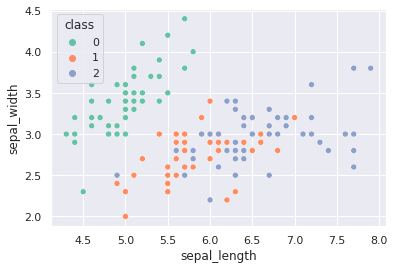

In [5]:
#Visualizo para darme una idea de cómo está distribuido el asunto IRIS
#A ojo de buen cubero, son 3 clusters, de todas formas intentaré Elbow Method
sns.set_theme(style="darkgrid")
sns.scatterplot(data=df, x="sepal_length", y="sepal_width", 
                hue="class", palette="Set2")

# 2-Scale this Sh*t!

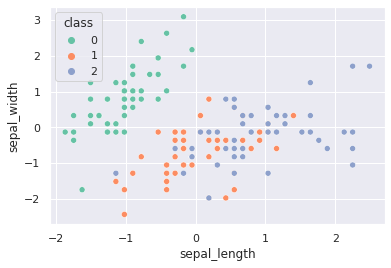

In [6]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(iris.data)
# Create dataframe using iris.data
flowers = pd.DataFrame(data=scaled_features, columns=["sepal_length", 
                                                      "sepal_width", 
                                                      "petal_length", "petal_width"])
# Append class / label data
flowers["class"] = iris.target
# Print the data and check for yourself
sns.scatterplot(data=flowers, x="sepal_length", y="sepal_width", 
                hue="class", palette="Set2")

# 3 - Correr K-Means sklearn con 3 clústers

In [7]:
#Inicializamos kmeans
kmeans = KMeans(
init="random",
n_clusters=3,
n_init=10,
max_iter=300,
random_state=42
)

In [8]:
#Sacamos los centroides de los clústers, pero primero nos deshacemos de lo que sobra
iris_features = flowers.drop(['petal_length', 'petal_width','class'], 
                             axis=1).to_numpy()

In [9]:
#hacemos fit y obtenemos los centroides
start = time.time()
kmeans.fit(iris_features)
end = time.time()
print("Tiempo del KMEANS Sklearn es de : ",(end-start),"sec")
centroids = kmeans.cluster_centers_
print("Los centroides son: ",centroids)

Tiempo del KMEANS Sklearn es de :  0.08179426193237305 sec
Los centroides son:  [[-0.97822861  0.90390597]
 [-0.05899721 -0.90478291]
 [ 1.18671078  0.12437601]]


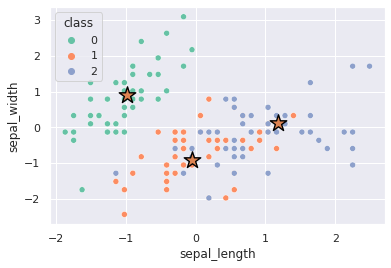

In [10]:
ax= sns.scatterplot(data=flowers, x="sepal_length", y="sepal_width", 
                    hue="class", palette="Set2")
ax = sns.scatterplot(data=centroids, x=centroids[:,0], y=centroids[:,1], 
                     s=300, ec='black', marker ="*", legend=False, ax=ax)
plt.show()

# 4 - Elbow Method

In [11]:
#Distortion: It is calculated as the average of the squared distances from the cluster 
#centers of the respective clusters. Typically, the Euclidean distance metric is used.
#Inertia: It is the sum of squared distances of samples to their closest cluster center.
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(iris_features)
    kmeanModel.fit(iris_features)
  
    distortions.append(sum(np.min(cdist(iris_features, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / iris_features.shape[0])
    inertias.append(kmeanModel.inertia_)

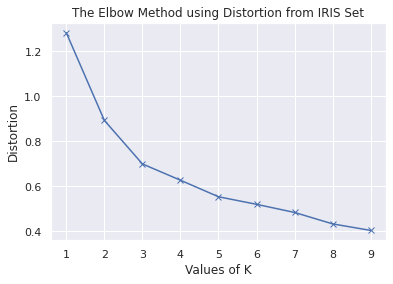

In [12]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion from IRIS Set')
plt.show()

# 5 - Mini-Batch K-Means con SGD

A variant of gradient descent that uses one sample to compute the gradient is called Stochastic Gradient Descent (SGD). As it performs the cluster update with only a single sample, it can be applied to online learning. In practice, we randomize our dataset and process one sample at a time. The learning rate is updated during each iteration, and for each cluster center

Tiempo del Mini-Batch K Means de Sklearn es de :  0.7232813835144043 sec
Los centroides son: [[-0.9868137  -0.89235609]
 [-0.05046296  0.1427109 ]
 [ 1.20858335  0.88293571]]


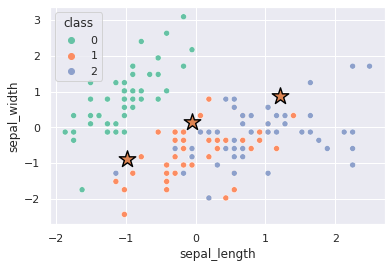

In [16]:
# perform the mini batch K-means
start = time.time()
batch_size = 15
mbk = MiniBatchKMeans(init ='random', n_clusters = 3,
                      batch_size = batch_size, n_init = 1024,
                      max_no_improvement = None, verbose = 0)
  
mbk.fit(iris_features)
mbk_means_cluster_centers = np.sort(mbk.cluster_centers_, axis = 0)
end = time.time()
print("Tiempo del Mini-Batch K Means de Sklearn es de : ",(end-start),"sec")
  
# print the labels of each data
print("Los centroides son:" , mbk_means_cluster_centers)

ax= sns.scatterplot(data=flowers, x="sepal_length", y="sepal_width", 
                    hue="class", palette="Set2")
ax = sns.scatterplot(data=mbk_means_cluster_centers, x=mbk_means_cluster_centers[:,0], y=mbk_means_cluster_centers[:,1], 
                     s=300, ec='black', marker ="*", legend=False, ax=ax)
plt.show()